In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np

In [0]:
class SN: 
  def __init__(self, w_init, b_init, algo):
    self.w = w_init
    self.b = b_init
    self.w_h = []
    self.b_h = []
    self.e_h = []
    self.algo = algo
  def sigmoid(self, x, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    return 1./(1. + np.exp(-(w*x+b)))
  def error(self, X, Y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None: 
      b = self.b 
    err=0
    for x, y in zip(X, Y):
      err += 0.5*(self.sigmoid(x, w, b)-y)**2
    return err
  def grad_w(self, x, y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b 
    y_pred= self.sigmoid(x, w, b)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
 
  def grad_b(self, x, y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b 
    y_pred= self.sigmoid(x, w, b)
    return (y_pred - y) * y_pred * (1 - y_pred)
  def append_log(self):
    self.w_h.append(self.w)
    self.b_h.append(self.b)
    self.e_h.append(self.error(self.X, self.Y))

  def fit(self, X, Y, epochs=100, eta=0.01, gamma=0.9, mini_batch_size=100, eps=1e-8, beta=0.9, beta1=0.9, beta2=0.9):
    self.w_h=[]
    self.b_h=[]
    self.e_h=[]
    self.X=X
    self.Y=Y

    if self.algo== 'Adam':
      v_w, v_b=0, 0
      m_w, m_b=0, 0
      num_updates=0
      for i in range(epochs):
          dw, db=0, 0
          for x, y in zip(X, Y):
            dw +=self.grad_w(x, y)
            db +=self.grad_b(x, y)
            num_updates +=1
            m_w=beta1*m_w +(1-beta1)*dw
            m_b=beta1*m_b +(1-beta1)*db
            v_w=beta2*v_w +(1-beta2)*dw**2
            v_b=beta2*v_b +(1-beta2)*db**2
            m_w_c=m_w/(1-np.power(beta1, num_updates))
            m_b_c=m_b/(1-np.power(beta1, num_updates))
            v_w_c=v_w/(1-np.power(beta2, num_updates))
            v_b_c=v_b/(1-np.power(beta2, num_updates))          
          self.w -= (eta/ np.sqrt(v_w_c)+eps)*m_w_c
          self.b -= (eta/ np.sqrt(v_b_c)+eps)*m_b_c
          self.append_log()

In [0]:
X=np.asarray([0.5, 2.5])
Y=np.asarray([0.2, 0.9])

algo = 'Adam'

w_init = -4
b_init= -0

epochs=1000
eta=1
gamma=0.8

w_min=-7
w_max=5

b_min=-5
b_max=5

mini_batch_size=20

animation_frames=20
plot_3d=True 
plot_2d=False 

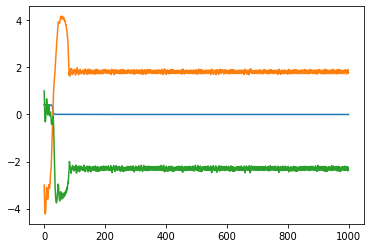

In [51]:
  sn=SN(w_init, b_init, algo)
  sn.fit(X, Y, epochs=epochs, eta=eta)
  plt.plot(sn.e_h)
  plt.plot(sn.w_h)
  plt.plot(sn.b_h)
  plt.show()

In [0]:
def plot_animate_3d(i):
  i=int(i*(epochs/animation_frames))
  line1.set_data(sn.w_h[:i+1], sn.b_h[:, i+1])
  line1.set_3D_properties(sn.e_h[:i+1])
  line2.set_data(sn.w_h[:i+1], sn.b_h[:, i+1])
  line2.set_3D_properties(sn.e_h[:i+1])
  title.set_text('Epoch: {:d}, Error: {:.4f}'.format(i, dn.e_h[i]))
  

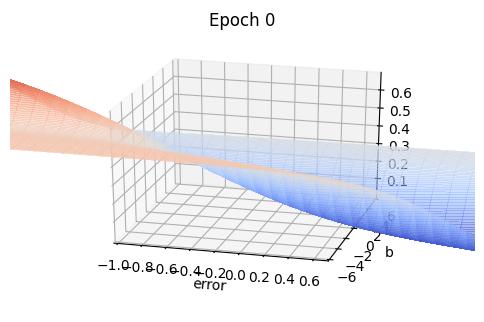

In [53]:
if plot_3d:
  W=np.linspace(w_min, w_max, 256)
  b=np.linspace(b_min, b_max, 256)
  WW, BB=np.meshgrid(W, b)
  Z=sn.error(X, Y, WW, BB)

  fig= plt.figure(dpi=100)
  ax=fig.gca(projection='3d')
  surf=ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
  cset=ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
  ax.set_xlabel('w')
  ax.set_xlim(w_min-1, w_max+1)
  ax.set_ylabel('b')
  ax.set_ylim(b_min-1, b_max+1)
  ax.set_xlabel('error')
  ax.set_xlim(-1, np.max(Z))
  ax.view_init(elev=25, azim=-75)
  ax.dist=12
  title=ax.set_title('Epoch 0')

In [0]:
#history variable 
if plot_3d:
  i=0
  line1, =ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], sn.e_h[:i+1], color='black', marker='.')
  line2, =ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], np.zeros(i+1)-1, color='red', marker='.')
  anim = animation.FuncAnimation(fig, func=plot_animate_3d, frames=animation_frames)
  rc('animation', html='jshtml')
  anim